In [1]:
from google.colab import files
files.upload()


Saving UScomments.csv to UScomments.csv
Saving USvideos.csv to USvideos.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
videos = pd.read_csv("USvideos.csv", dtype={
    'video_id': str,
    'title': str,
    'channel_title': str,
    'category_id': int,
    'tags': object,
    'views': int,
    'likes': int,
    'dislikes': int,
    'comment_total': int,
    'thumbnail_link': str,
    'date': str
})

# Parse video tags into list
videos["tags"] = videos["tags"].map(lambda tag: [] if tag == "[none]" else tag.split('|'))
# remove thumbnail link column
videos.drop(columns=['thumbnail_link'], inplace=True)

comments = pd.read_csv("UScomments.csv", dtype={
    'video_id': str,
    'comment_text': str,
    'likes': int,
    'replies': int
})

comments.dropna(inplace = True) #drop entries with null values


Videos Correlation Matrix:
                    tags     views     likes  dislikes  comment_total
tags           1.000000  0.091263  0.075111  0.094987       0.046620
views          0.091263  1.000000  0.832832  0.541882       0.715500
likes          0.075111  0.832832  1.000000  0.497251       0.836384
dislikes       0.094987  0.541882  0.497251  1.000000       0.543902
comment_total  0.046620  0.715500  0.836384  0.543902       1.000000


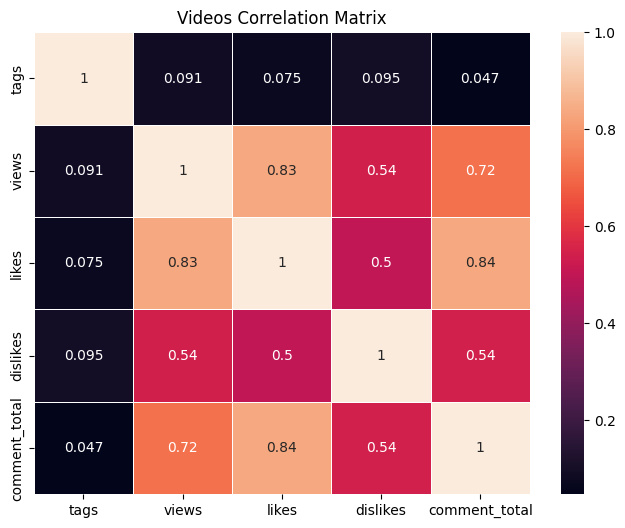

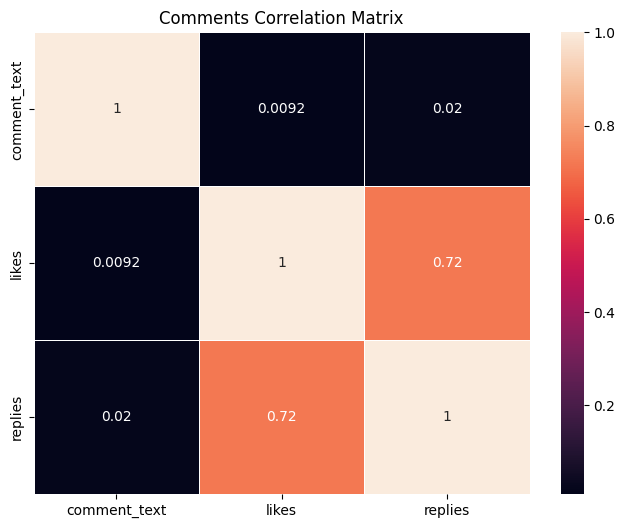

In [4]:
# pre-process video data
numerical_videos = videos.copy()
numerical_videos = numerical_videos.drop(columns=['video_id', 'title', 'channel_title', 'category_id', 'date'])
numerical_videos['tags'] = numerical_videos['tags'].apply(lambda x: len(x))

#print("Nominal Video DF head:\n", numerical_videos.head())

# create correlation analysis matrix of video data
Videos_cor_matrix = numerical_videos.corr(method='pearson')

print("Videos Correlation Matrix:\n", Videos_cor_matrix)

# Create a heatmap plot using Seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(Videos_cor_matrix, annot=True, linewidths=0.5)
plt.title('Videos Correlation Matrix')
plt.show()

#create correlation analysis matrix of comments data

# pre-process comments data
numerical_comments = comments.drop(columns=['video_id'])
numerical_comments['comment_text'] = numerical_comments['comment_text'].apply(lambda x: len(x.split()))

#create correlation analysis matrix of comments data
comments_cor_matrix = numerical_comments.corr(method='pearson')

# Create a heatmap plot using Seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(comments_cor_matrix, annot=True, linewidths=0.5)
plt.title('Comments Correlation Matrix')
plt.show()


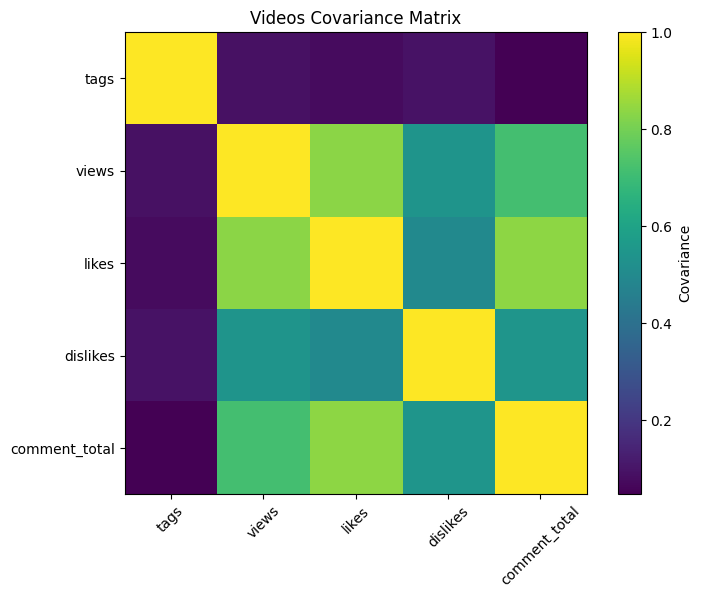

Comments Covariance Matrix:
               comment_text     likes   replies
comment_text      1.000000  0.009197  0.019797
likes             0.009197  1.000000  0.718561
replies           0.019797  0.718561  1.000000


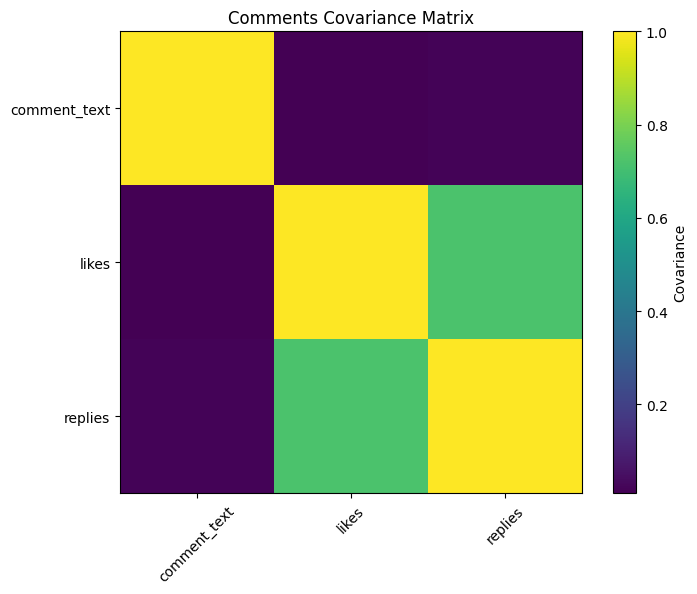

In [5]:
##### create covariance analysis matrix of videos data #####

# Standardize the numerical columns, each feature has a mean of 0 and a standard deviation of 1
standardized_num_videos = (numerical_videos - numerical_videos.mean()) / numerical_videos.std()

# create covariance analysis matrix of video data
Videos_cov_matrix = standardized_num_videos.cov()

# Create a covariance matrix plot using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(Videos_cov_matrix, interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Videos Covariance Matrix')
plt.xticks(range(len(Videos_cov_matrix.columns)), Videos_cov_matrix.columns, rotation=45)
plt.yticks(range(len(Videos_cov_matrix.columns)), Videos_cov_matrix.columns)
plt.show()

##### create covariance analysis matrix of comments data #####

# Standardize the numerical columns, each feature has a mean of 0 and a standard deviation of 1
standardized_num_comments = (numerical_comments - numerical_comments.mean()) / numerical_comments.std()

# create covariance analysis matrix of video data
comments_cov_matrix = standardized_num_comments.cov()
print("Comments Covariance Matrix:\n", comments_cov_matrix)

# Create a covariance matrix plot using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(comments_cov_matrix, interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Comments Covariance Matrix')
plt.xticks(range(len(comments_cov_matrix.columns)), comments_cov_matrix.columns, rotation=45)
plt.yticks(range(len(comments_cov_matrix.columns)), comments_cov_matrix.columns)
plt.show()

Text(0.5, 1.0, 'Views vs likes')

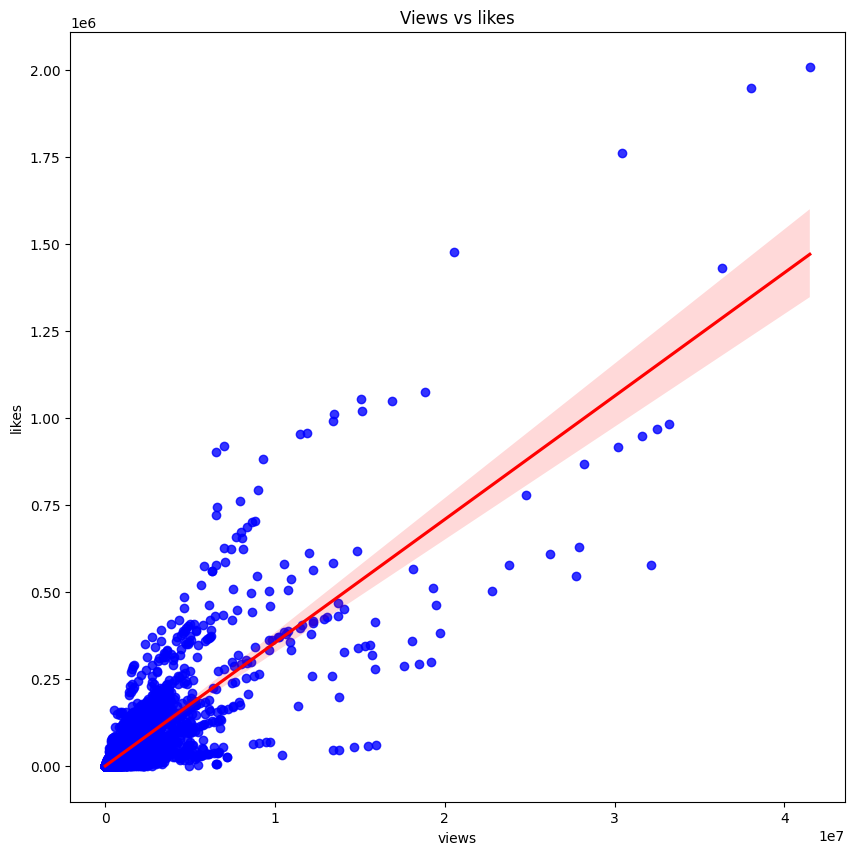

In [8]:
# plot views and likes
plt.figure(figsize=(10,10))
sns.regplot(x=videos['views'], y=videos['likes'],scatter_kws={"color": "blue"}, line_kws={"color": "red"});
plt.title("Views vs likes")


In [10]:
### import category descriptions to pair with category id's ###
import json

# Opening JSON file
f = open('US_category_id.json')

# returns JSON object as a dictionary
us_category_id = json.load(f)

# Closing file
f.close()

# Add a new column with the actual category name corresponding to the category_id
# category actual name
list_cat_name = []
videos_Categories = videos.copy(deep=True)

for i, row in videos_Categories.iterrows():
  id = str(row["category_id"])
  for item in us_category_id["items"]:
    # print(item)
    if id == item["id"]:
      list_cat_name.append(item["snippet"]["title"])
      break

videos_Categories.insert(len(videos_Categories.columns),"category_name", list_cat_name)
# videos_Categories.sort_values(by='category_id', inplace=True)
print(videos_Categories.head(20)[["category_id", "category_name"]])

    category_id         category_name
0            24         Entertainment
1            28  Science & Technology
2            22        People & Blogs
3            28  Science & Technology
4            23                Comedy
5             1      Film & Animation
6            23                Comedy
7            28  Science & Technology
8            22        People & Blogs
9             1      Film & Animation
10           23                Comedy
11           23                Comedy
12           23                Comedy
13           24         Entertainment
14           24         Entertainment
15           28  Science & Technology
16           24         Entertainment
17            1      Film & Animation
18           26         Howto & Style
19            1      Film & Animation


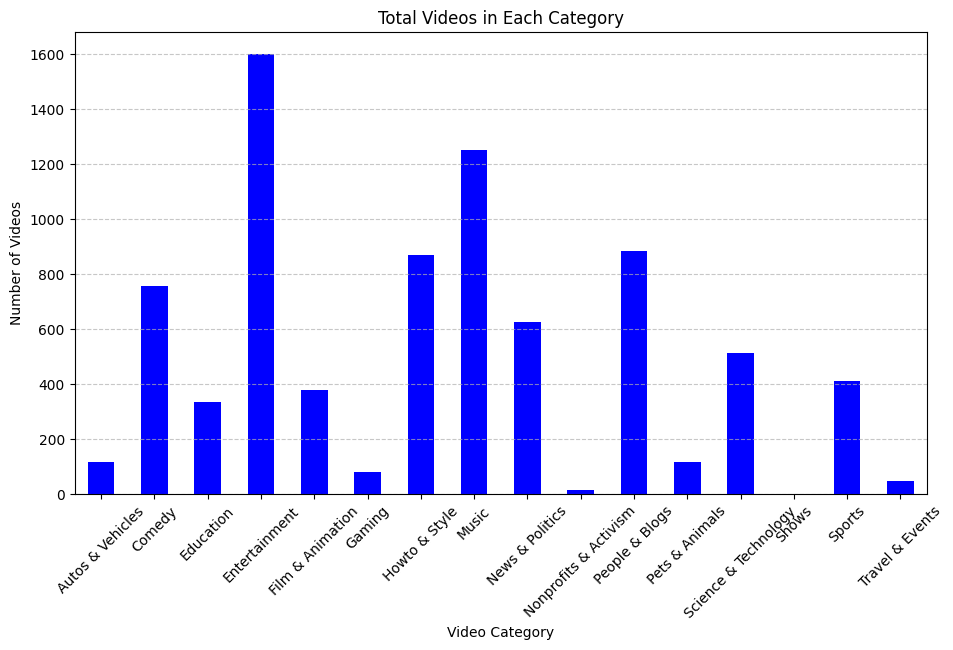

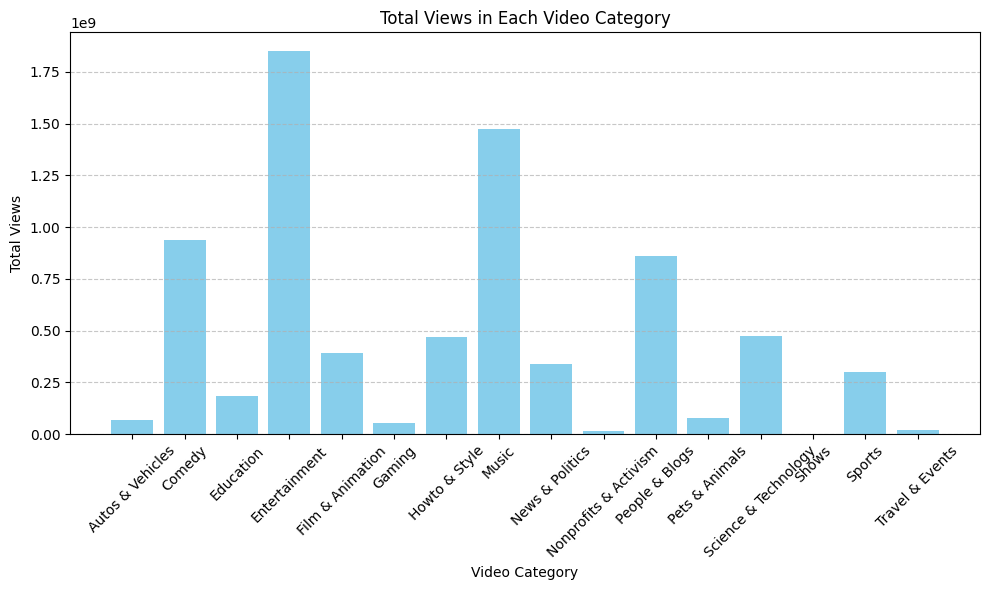

In [31]:
### classification ###

# Count the number of videos in each category
category_counts = videos_Categories['category_name'].value_counts()

# Sort the index (category IDs) to maintain the original order
category_counts = category_counts.sort_index()

# Create a bar graph
plt.figure(figsize=(11, 6))
category_counts.plot(kind='bar', color='blue')
plt.title('Total Videos in Each Category')
plt.xlabel('Video Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.show()

# Group by category_id and sum the views for each category
category_views = videos.groupby('category_id')['views'].sum().reset_index()
category_views = category_views.merge(videos_Categories[['category_id', 'category_name']], on='category_id', how='left').sort_values('category_name')


# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(category_views['category_name'], category_views['views'], color='skyblue')
plt.title('Total Views in Each Video Category')
plt.xlabel('Video Category')
plt.ylabel('Total Views')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Popular Videos:
         video_id                                              title  \
0     XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
19    UCrBICYM0yM  Downsizing (2017) - Official Trailer - Paramou...   
26    LcZ2AuvxXNA                Nerf Bow Trick Shots | Dude Perfect   
28    1ZNZY-gd3K0  Joe Arpaio: Last Week Tonight with John Oliver...   
64    iXexmZm3_j8            $3 Seafood Vs. $213 Seafood • Australia   
...           ...                                                ...   
7940  bvev1Bjx6oA                         Want It All  (Full Length)   
7949  qvXXMsiQBDg      Louis Tomlinson - Just Like You (Lyric Video)   
7976  mPjgRKW_Jmk  Equifax: Last Week Tonight with John Oliver (HBO)   
7986  -_Q5kO4YXFs  My baby hears me for the first time and is alm...   
7990  Hlt3rA-oDao                                    Kellywise - SNL   

         views   likes  dislikes  like_to_dislike_ratio  
0      4394029  320053      5931              53.962738  
19 

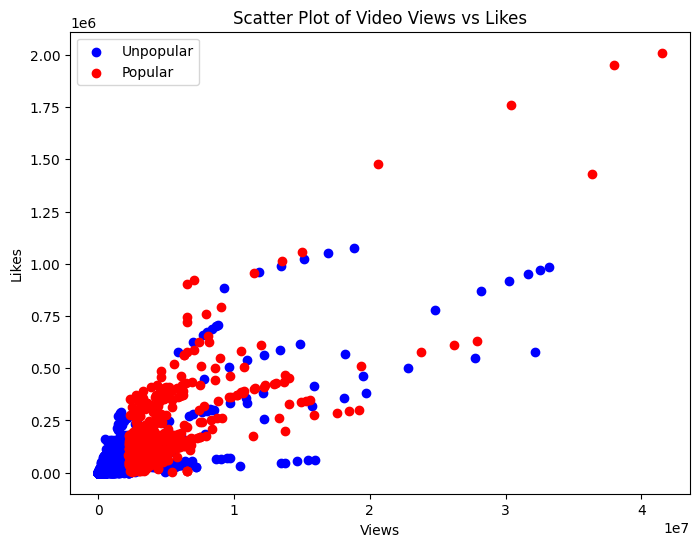

In [ ]:
### identifying popular videos based on high views and high like to dislike ratio

# Calculate like-to-dislike ratio
videos['like_to_dislike_ratio'] = videos['likes'] / videos['dislikes']

# Define thresholds for high views and high like-to-dislike ratio
high_views_threshold = videos['views'].quantile(0.9)  # Example: top 10% of views
high_like_to_dislike_ratio_threshold = 15  # Example: like-to-dislike ratio greater than 10

# Classify videos as popular or non-popular
videos['is_popular'] = (videos['views'] > high_views_threshold) & (videos['like_to_dislike_ratio'] > high_like_to_dislike_ratio_threshold)

# Display popular videos
popular_videos = videos[videos['is_popular']]
print("Popular Videos:")
print(popular_videos[['video_id', 'title', 'views', 'likes', 'dislikes', 'like_to_dislike_ratio']])

# Separate popular and non-popular videos
popular_videos = videos[videos['is_popular']]
unpopular_videos = videos[~videos['is_popular']]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(unpopular_videos['views'], unpopular_videos['likes'], color='blue', label='Unpopular')
plt.scatter(popular_videos['views'], popular_videos['likes'], color='red', label='Popular')
plt.title('Scatter Plot of Popular Videos vs Unpopular')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.legend()
plt.show()